In [54]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import pickle

from utils import helper, Solver, TimeKeeper
from utils import Solver

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
data_df = pd.read_csv('data/mid_res/20210526_data_df.csv')
val_df = pd.read_csv('data/mid_res/20210526_val_df.csv')
df = pd.concat([data_df, val_df], axis = 0)

In [31]:
col_drop_x = ['time', 'label']
col_label = 'label'
col_drop = ['latitude',
 'longitude',
 'altitude',
 'time_dlt',
 'valid_dlt',
 'east',
 'north',
 'east_dlt',
 'north_dlt',
 'east_speed',
 'north_speed',
 'cells_ctype_mode',
 'speed_dif',
 'speed_dlt',
 'speed'
 ]

In [47]:
# test_ratio = 0.1
# X_train, X_test, y_train, y_test = train_test_split(X, df[col_label], test_size = test_ratio, random_state = 999)
X_train, y_train = data_df.drop(col_drop_x + col_drop, axis = 1).fillna(0), data_df[col_label]
X_val, y_val = val_df.drop(col_drop_x + col_drop, axis = 1).fillna(0), val_df[col_label]

In [48]:
solver = Solver.Solver(X_train, y_train)

X_train: (980527, 32)
y_train: 980527


In [49]:
solver.train()

Training rf...
Time elapsed for training rf: 30.2
Training bag (tree-based)...
Time elapsed for training bag (tree-based): 28.14
Training LightGBM...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5020
[LightGBM] [Info] Number of data points in the train set: 784421, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score -2.080999
[LightGBM] [Info] Start training from score -2.07

In [52]:
# check the size of the trained model on hard disc
with open('model/model_rf.pickle','wb') as p:
    pickle.dump(solver.model_rf, p)
with open('model/model_bag.pickle','wb') as p:
    pickle.dump(solver.model_bag, p)
with open('model/model_lgb.pickle','wb') as p:
    pickle.dump(solver.model_lgb, p)

[[118665    889     20    285     87    205     71   2079]
 [  1006 115172    106    424    122    280   1039   4617]
 [    81    472  40281   1309     14    104      0     15]
 [   160    934    191 115504    436     88     90      0]
 [   242    454     71   4460 151626    905    937      0]
 [  1161    406     32   1797   9504 127601   1125     17]
 [  2520    370     24    284   7208   2584 142673    597]
 [   540     58      0      2   2747    508    726 114602]]
              precision    recall  f1-score   support

       Still       0.95      0.97      0.96    122301
     Walking       0.97      0.94      0.95    122766
         Run       0.99      0.95      0.97     42276
        Bike       0.93      0.98      0.96    117403
         Car       0.88      0.96      0.92    158695
         Bus       0.96      0.90      0.93    141643
       Train       0.97      0.91      0.94    156260
      Subway       0.94      0.96      0.95    119183

    accuracy                           

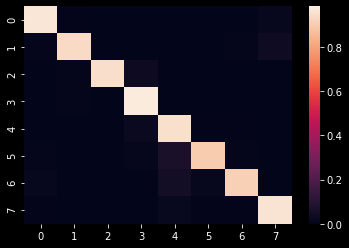

In [53]:
# for training dataset
solver.predict_raw(X_train, y_train)
solver.predict_mean()
helper.evaluate(y_train, solver.pred_mean)

[[24842   363     0    28     7    43   403  4150]
 [ 3238 19460     3    41   262  1522   633   990]
 [    0  1540   202  1032     0     0     0     0]
 [  145   605   221  9815     0     0     0  1245]
 [  314   440     0   549 10446  4921  3720    83]
 [  745    24     0    46     0  4852  1429  2082]
 [ 3148    45     0    51  4191   312 13247   814]
 [  592     0     0     0   202   129  4542 16244]]
              precision    recall  f1-score   support

       Still       0.75      0.83      0.79     29836
     Walking       0.87      0.74      0.80     26149
         Run       0.47      0.07      0.13      2774
        Bike       0.85      0.82      0.83     12031
         Car       0.69      0.51      0.59     20473
         Bus       0.41      0.53      0.46      9178
       Train       0.55      0.61      0.58     21808
      Subway       0.63      0.75      0.69     21709

    accuracy                           0.69    143958
   macro avg       0.65      0.61      0.61    14

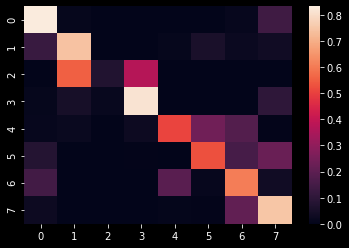

In [57]:
# for validate dataset
timer = TimeKeeper.TimeKeeper()
solver.predict_raw(X_val, y_val)
solver.predict_mean()
helper.evaluate(y_val, solver.pred_mean)
print("Time used: {}".format(timer.get_update_time()))

In [58]:
with open('model/model_for_form.pickle','wb') as p:
    pickle.dump(solver, p)